# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [158]:
# Load pickled data
import pickle
import numpy as np
import cv2
from pylab import array, arange
from sklearn import preprocessing
# TODO: Fill this in based on where you saved the training and testing data
training_file = "./train.p"
validation_file= "./valid.p"
testing_file = "./test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [159]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Number of Samples in each training class


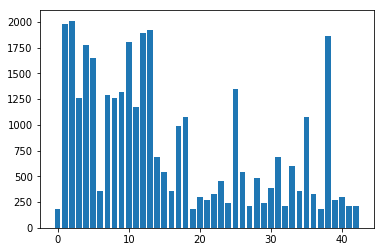

Number of Samples in each testing class


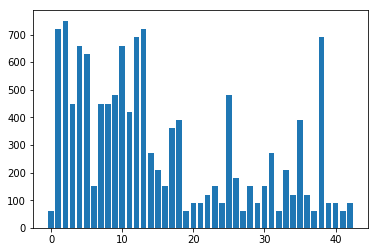

In [160]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
#Runs through the data and creates a graph to display the number of samples per class
#display samples per class for training and testing set
def showAveragePerClass(X_list,y_list,n_classes):
    n_samples_per_class = np.zeros(n_classes)
    repr_class_im = np.zeros((43,32,32))
                             
    for i in range(0,n_classes):
        avg_im = np.zeros((32,32))
        im = np.zeros(image_shape)
        for j in range(0,len(X_list)):
            if(y_list[j] == i):
                n_samples_per_class[i] = n_samples_per_class[i] + 1
                im = np.mean(X_list[j].squeeze(),axis=2)
                avg_im = avg_im + im
    plt.bar(range(43),n_samples_per_class)
    plt.show()
    return n_samples_per_class,repr_class_im

print('Number of Samples in each training class')
n_samples_per_class_train,repr_class_im_train = showAveragePerClass(X_train,y_train,n_classes)
print('Number of Samples in each testing class')
n_samples_per_class_test,repr_class_im_test = showAveragePerClass(X_test,y_test,n_classes)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [161]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def convertYUV(img):
    res = []
    for x in range(len(img)):
        temp = cv2.cvtColor(img[x], cv2.COLOR_RGB2YUV)
        y, u, v = cv2.split(temp)
        y = preprocessing.normalize(y)
        y.shape = y.shape + (1,)
        res.append(y)   
    return res
    
X_train_rgb = X_train
X_train_normalized = convertYUV(X_train)

X_valid_rgb = X_valid
X_valid_normalized = convertYUV(X_valid)

X_test_rgb = X_test
X_test_normalized = convertYUV(X_test)


X_train = X_train_normalized
X_test = X_test_normalized
X_valid = X_valid_normalized

print("Done YUV conversion and normalization")

C:\Miniconda3\envs\carnd-term1\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


Done YUV conversion and normalization


In [163]:
print(np.mean(X_train))

0.163443959602


In [164]:
def random_scale_img(img):
    img2=img.copy()
    sc_y=0.2*np.random.rand()+1.0
    img2=cv2.resize(img, None, fx=1, fy=sc_y, interpolation = cv2.INTER_CUBIC)
    
    dy = int((img2.shape[1]-img.shape[0])/2)
    end = img.shape[1]-dy
    img2 = img2[dy:end,:]
    assert img2.shape[0] == 32
    return img2

def random_brightness(img):
    shifted = img + 1.0   # shift to (0,2) range
    img_max_value = max(shifted.flatten())
    max_coef = 2.0/img_max_value
    min_coef = max_coef - 0.1
    coef = np.random.uniform(min_coef, max_coef)
    dst = shifted * coef - 1.0
    return dst

def transform_img(img):
    img = img.copy()
    
    img = random_brightness(img)
    img = random_scale_img(img)
    img.shape = img.shape + (1,)
    return img


In [165]:
print(transform_img(X_train[100]).shape)


(32, 32, 1)


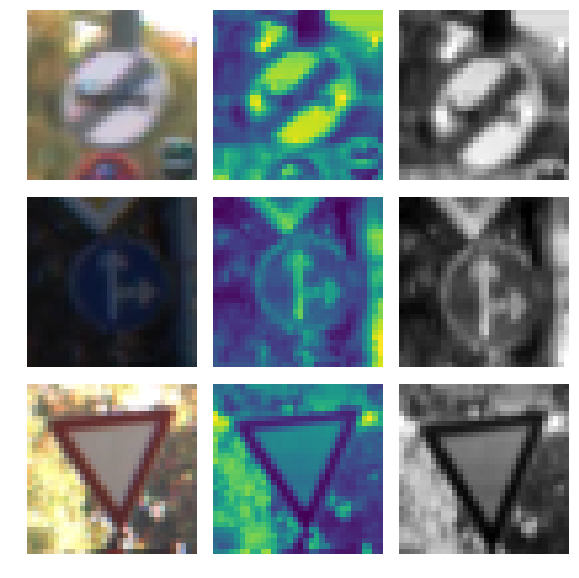

In [166]:
fig, axs = plt.subplots(3,3, figsize=(10, 10))
fig.subplots_adjust(hspace = .1, wspace=.001)
axs = axs.ravel()

#original image 100
img = X_train_rgb[100]
axs[0].axis('off')
axs[0].imshow(img)

#grayscaled image 100
axs[1].axis('off')
axs[1].imshow(X_train[100].squeeze())

#transformed image 100
axs[2].axis('off')
axs[2].imshow(transform_img(X_train[100]).squeeze(), cmap="gray")

#original image 1000
img = X_train_rgb[1000]
axs[3].axis('off')
axs[3].imshow(img)

#grayscaled image 1000
axs[4].axis('off')
axs[4].imshow(X_train[1000].squeeze())

#transformed image 1000
axs[5].axis('off')
axs[5].imshow(transform_img(X_train[1000]).squeeze(),cmap="gray")

#original image 7000
img = X_train_rgb[22222]
axs[6].axis('off')
axs[6].imshow(img)

#grayscaled image 7000
axs[7].axis('off')
axs[7].imshow(X_train[22222].squeeze())

#transformed image 7000
axs[8].axis('off')
axs[8].imshow(transform_img(X_train[22222]).squeeze(), cmap="gray")

In [167]:
print("len of x train", len(X_train))
print("shape of x train", X_train[0].shape)
print("len of x train normal", len(X_train_normalized))
print("shape of x train normal", X_train_normalized[0].shape)
print("shape after transform img x train", transform_img(X_train[0]).shape)
print("shape after transform img x train normal", transform_img(X_train_normalized[0]).shape)

len of x train 34799
shape of x train (32, 32, 1)
len of x train normal 34799
shape of x train normal (32, 32, 1)
shape after transform img x train (32, 32, 1)
shape after transform img x train normal (32, 32, 1)


In [168]:
print('X, y shapes:', X_train_normalized[0].shape, y_train.shape)

input_indices = []
output_indices = []

for class_n in range(n_classes):
    class_indices = np.where(y_train == class_n)
    n_samples = len(class_indices[0])
    if n_samples < 850:
        print(class_n, "-> Adding: ", 850-n_samples)
        for i in range(850 - n_samples):
            input_indices.append(class_indices[0][i%n_samples])
            output_indices.append(len(X_train_normalized))
            new_img = X_train_normalized[class_indices[0][i % n_samples]]
            new_img = transform_img(new_img)
            new_img.shape = new_img.shape
            X_train_normalized = np.concatenate((X_train_normalized, [new_img]), axis=0)
            y_train = np.concatenate((y_train, [class_n]), axis=0)
            
print('X, y shapes:', X_train_normalized.shape, y_train.shape)

X, y shapes: (32, 32, 1) (34799,)
0 -> Adding:  670
6 -> Adding:  490
14 -> Adding:  160
15 -> Adding:  310
16 -> Adding:  490
19 -> Adding:  670
20 -> Adding:  550
21 -> Adding:  580
22 -> Adding:  520
23 -> Adding:  400
24 -> Adding:  610
26 -> Adding:  310
27 -> Adding:  640
28 -> Adding:  370
29 -> Adding:  610
30 -> Adding:  460
31 -> Adding:  160
32 -> Adding:  640
33 -> Adding:  251
34 -> Adding:  490
36 -> Adding:  520
37 -> Adding:  670
39 -> Adding:  580
40 -> Adding:  550
41 -> Adding:  640
42 -> Adding:  640
X, y shapes: (47780, 32, 32, 1) (47780,)


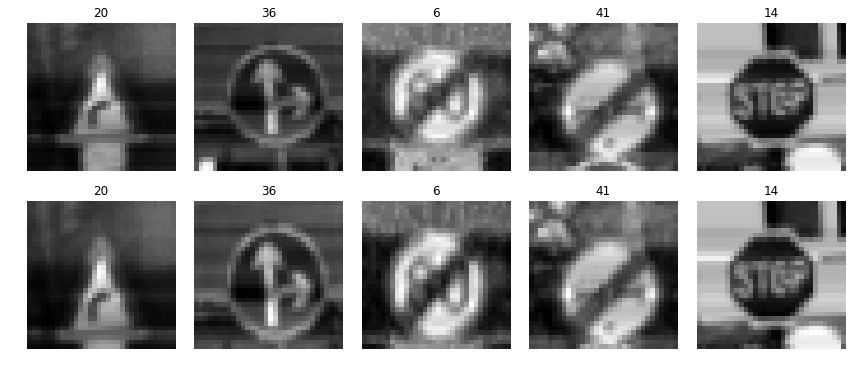

In [169]:
choices = list(range(len(input_indices)))
picks = []
for i in range(5):
    rnd_index = np.random.randint(low=0,high=len(choices))
    picks.append(choices.pop(rnd_index))
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(5):
    image = X_train_normalized[input_indices[picks[i]]].squeeze()
    axs[i].axis('off')
    axs[i].imshow(image, cmap = 'gray')
    axs[i].set_title(y_train[input_indices[picks[i]]])
for i in range(5):
    image = X_train_normalized[output_indices[picks[i]]].squeeze()
    axs[i+5].axis('off')
    axs[i+5].imshow(image, cmap = 'gray')
    axs[i+5].set_title(y_train[output_indices[picks[i]]])

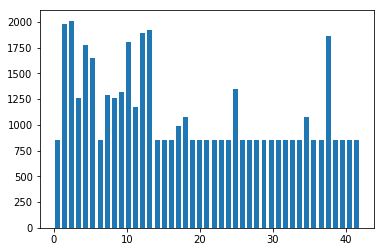

In [170]:
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

In [171]:
from sklearn.utils import shuffle

X_train_normalized, y_train = shuffle(X_train_normalized, y_train)

print('done')

done


In [172]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train_normalized, y_train, 
                                                                test_size=0.20, random_state=42)

print("Old X_train size:",len(X_train_normalized))
print("X_validation size:",len(X_validation))

Old X_train size: 47780
X_validation size: 9556


### Model Architecture

In [173]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

#hyperparams
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

EPOCHS = 150
BATCH_SIZE = 128

def LeNet(x):    
    mu = 0
    sigma = 0.1

    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    #  Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #  Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    #  Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # TODO: Layer 3: Convolutional. Output = 1x1x400.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma))
    conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID')
    conv3_b = tf.Variable(tf.zeros(400))
    
    conv3 = tf.nn.relu(conv3)

    # SFlatten. Input = 1x1x400. Output = 400.
    fc1   = flatten(conv3)

    dr2 = tf.nn.dropout(fc1, dropout) 
    
    #  Layer 5: Fully Connected. Input = 400. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(400, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(dr2, fc3_W) + fc3_b

    return logits

In [174]:

# x is placeholder for the image data
# y is placeholder for label data
# dropout is the variable used to determine dropout
# one_hot_y holds the result of the built in one hot function
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
dropout = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [175]:

rate = 0.0009
#the logits are created through the LeNet function above
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

###
predict_operation = tf.argmax(logits, 1)
predict_proba_operation = tf.nn.softmax(logits=logits)

In [177]:
#setting up the evaluate function to be used to check the accuracy of the network
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, dropout: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
###
def predict(X_data):
    num_examples = len(X_data)
    sess = tf.get_default_session()
    predicted_proba = list()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x = X_data[offset:offset+BATCH_SIZE]
        predicted_proba.extend( sess.run(predict_proba_operation, feed_dict={x: batch_x, dropout: 1.0}))
        
        
    return predicted_proba

ValueError: At least two variables have the same name: fully_connected_3/biases/Adam_1

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [149]:

### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, dropout: 0.5})
        
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ... Loss = 1.719 : Validation Accuracy = 0.424
EPOCH 2 ... Loss = 0.528 : Validation Accuracy = 0.744
EPOCH 3 ... Loss = 0.188 : Validation Accuracy = 0.874
EPOCH 4 ... Loss = 0.097 : Validation Accuracy = 0.912
EPOCH 5 ... Loss = 0.039 : Validation Accuracy = 0.920
EPOCH 6 ... Loss = 0.024 : Validation Accuracy = 0.946
EPOCH 7 ... Loss = 0.024 : Validation Accuracy = 0.935
EPOCH 8 ... Loss = 0.015 : Validation Accuracy = 0.924
EPOCH 9 ... Loss = 0.052 : Validation Accuracy = 0.918
EPOCH 10 ... Loss = 0.024 : Validation Accuracy = 0.929
EPOCH 11 ... Loss = 0.007 : Validation Accuracy = 0.940
EPOCH 12 ... Loss = 0.007 : Validation Accuracy = 0.940
EPOCH 13 ... Loss = 0.007 : Validation Accuracy = 0.943
EPOCH 14 ... Loss = 0.006 : Validation Accuracy = 0.938
EPOCH 15 ... Loss = 0.003 : Validation Accuracy = 0.949
EPOCH 16 ... Loss = 0.007 : Validation Accuracy = 0.943
EPOCH 17 ... Loss = 0.008 : Validation Accuracy = 0.951
EPOCH 18 ... Loss = 0.010 : Validation Accur

EPOCH 147 ... Loss = 0.000 : Validation Accuracy = 0.961
EPOCH 148 ... Loss = 0.000 : Validation Accuracy = 0.964
EPOCH 149 ... Loss = 0.007 : Validation Accuracy = 0.933
EPOCH 150 ... Loss = 0.005 : Validation Accuracy = 0.959


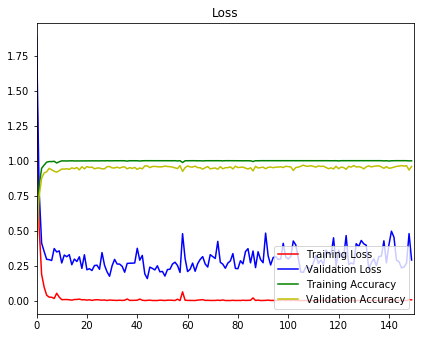

Model saved


In [151]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    train_loss_history = []
    valid_loss_history = []
    train_acc_history = []
    valid_acc_history = []
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={features_input: batch_x, labels_input: batch_y, keep_prob: dropout})
        validation_loss, validation_accuracy = evaluate(X_valid, y_valid)
        valid_loss_history.append(validation_loss)
        valid_acc_history.append(validation_accuracy)
        train_loss, train_accuracy = evaluate(X_train, y_train)
        train_loss_history.append(train_loss)
        train_acc_history.append(train_accuracy)
        print("EPOCH {} ...".format(i+1),"Loss = {:.3f} : Validation Accuracy = {:.3f}".format(train_loss,validation_accuracy))
 
    loss_plot = plt.subplot(2,1,1)
    loss_plot.set_title('Loss')
    loss_plot.plot(train_loss_history, 'r', label='Training Loss')
    loss_plot.plot(valid_loss_history, 'b', label='Validation Loss')
    loss_plot.set_xlim([0, EPOCHS])
    loss_plot.legend(loc=4)
    acc_plot = plt.subplot(2,1,1)
    acc_plot.set_title('Loss')
    acc_plot.plot(train_acc_history, 'g', label='Training Accuracy')
    acc_plot.plot(valid_acc_history, 'y', label='Validation Accuracy')
    acc_plot.set_xlim([0, EPOCHS])
    acc_plot.legend(loc=4)
    plt.tight_layout()
    plt.show()
    saver.save(sess, './mdnet')
    print("Model saved")

In [152]:
# ok now the final test on the Test-set
with tf.Session() as sess:    
    X_test,y_test = shuffle(X_test,y_test)
    saver = tf.train.import_meta_graph('mdnet.meta')
    saver.restore(sess,tf.train.latest_checkpoint('./'))
    Loss, accur =evaluate(X_test,y_test)
    print("Test_Loss = {:.3f} : Test_Accuracy = {:.3f}".format(Loss,accur))

INFO:tensorflow:Restoring parameters from ./mdnet
Test_Loss = 0.558 : Test_Accuracy = 0.947


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

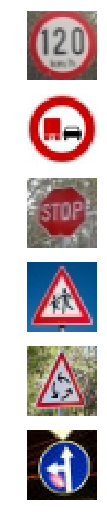

In [153]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
#Import traffic signs class names
import matplotlib.image as mpimg

im_container = np.zeros((6,32,32,3), dtype=np.uint8)
im_container[0] = mpimg.imread("./test_images/8.jpg",1)
im_container[1] = mpimg.imread("./test_images/10.jpg",1)
im_container[2] = mpimg.imread("./test_images/14.jpg",1)
im_container[3] = mpimg.imread("./test_images/28.jpg",1)
im_container[4] = mpimg.imread("./test_images/40.jpg",1)
im_container[5] = mpimg.imread("./test_images/1.jpg",1)

for i in range(6):
    
    plt.subplot(6, 1, i+1)
    plt.imshow(im_container[i])
    plt.axis('off')
    
im_container = np.asarray(im_container,dtype=np.float32)
im_container = normalize(im_container)

### Predict the Sign Type for Each Image

INFO:tensorflow:Restoring parameters from ./mdnet


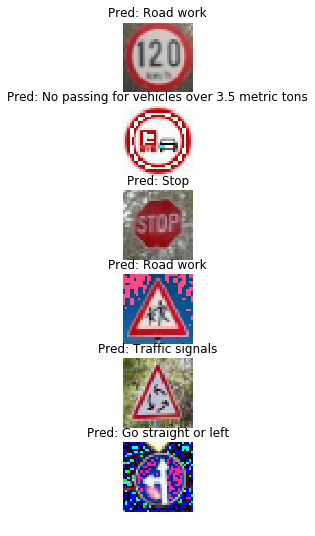

In [154]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:    
   
    saver = tf.train.import_meta_graph('mdnet.meta')
    saver.restore(sess,tf.train.latest_checkpoint('./'))
    pred_logits = sess.run(logits,feed_dict={features_input:im_container,keep_prob:1})
    pred_category = tf.argmax(pred_logits, 1)
    for i in range(6):
        plt.subplot(6,1,i+1)
        plt.imshow(im_container[i])
        plt.axis('off')
        plt.title('Pred: {}'.format(lookup[pred_category[i].eval()]))
    
    #print(lookup[pred_category[0].eval()])

### Analyze Performance

In [155]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:    
    extra_labels = [18,14,12,17,27,4]
    saver = tf.train.import_meta_graph('mdnet.meta')
    saver.restore(sess,tf.train.latest_checkpoint('./'))
    pred_logits = sess.run(logits,feed_dict={features_input:im_container,keep_prob:1})
    pred_category = tf.argmax(pred_logits, 1)
    #print(pred_category.eval())
    Loss, accur =evaluate(im_container,extra_labels)
    print("Test_Accuracy = {:.1f}%".format(accur*100))

INFO:tensorflow:Restoring parameters from ./mdnet
Test_Accuracy = 0.0%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [3]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    output = sess.run(tf.nn.top_k(tf.nn.softmax(logits), 5),feed_dict={x: ger_trafics_gray_norm_data, keep_prob:1.0})
    
    for i in range(len(output[0])):
        print("Image {0}:({1})".format(i+1, result[ger_trafic_lebel[i]][0]))
        print("Top 5 probabilites: {0}".format(output[0][i]))
        print("Top 5 indexes: {0}".format(output[1][i]))
        print()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.